 # Iris Data Species

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc


 #

In [2]:
iris=pd.read_csv('/home/rahul/Desktop/Link to rahul_environment/Projects/Machine_Learning Projects/Iris_Species/Iris.csv')

iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris['Species'].value_counts()


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

 # Creating the bar plot

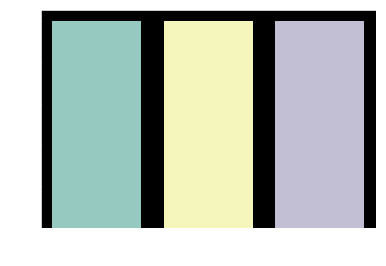

In [5]:
sns.countplot('Species',data=iris)


 ## Counting the values in the pie plot

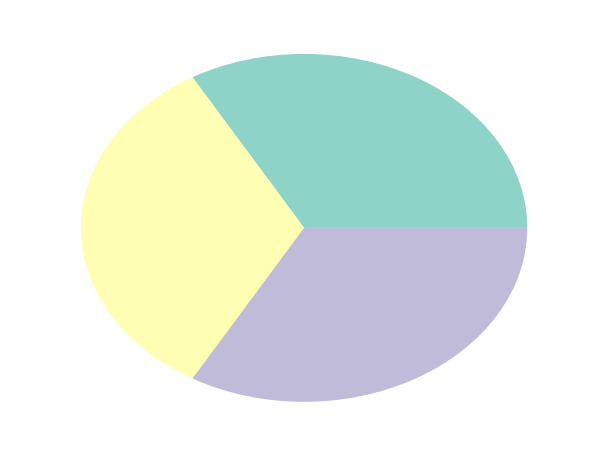

In [6]:
iris['Species'].value_counts().plot.pie(figsize=(10,8))


 ## Joint plot: Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


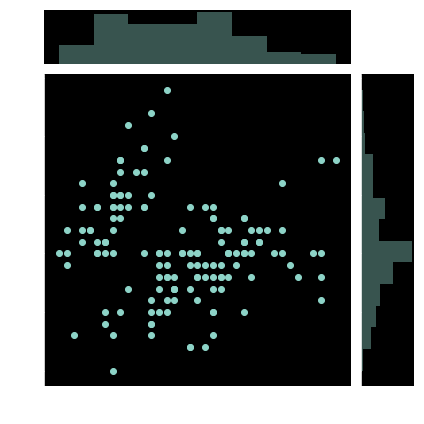

In [7]:
figure=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)


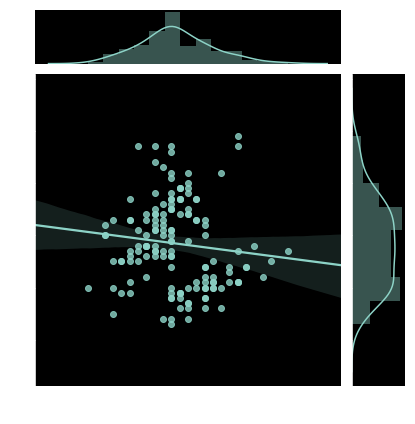

In [8]:
sns.jointplot(x='SepalWidthCm',y='SepalLengthCm',data=iris,kind='reg')


 ## Jointplot's for the Sepal Length and Width

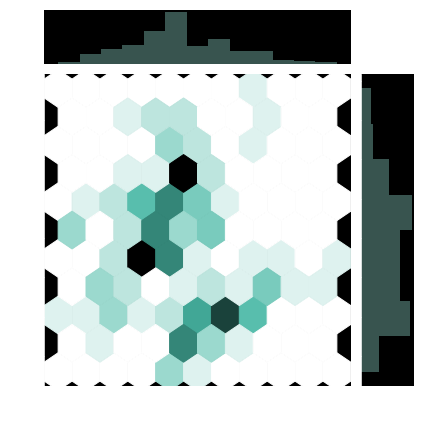

In [9]:
sns.jointplot(x='SepalWidthCm',y='SepalLengthCm',data=iris,kind='hex')


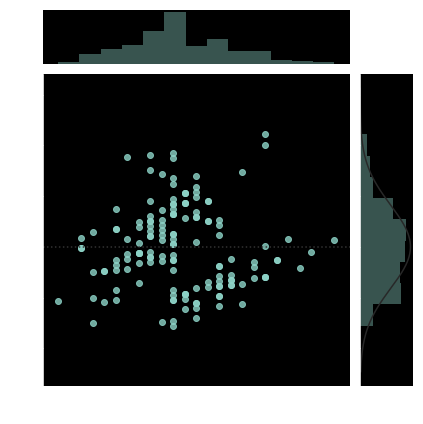

In [10]:
sns.jointplot(x='SepalWidthCm',y='SepalLengthCm',data=iris,kind='resid')


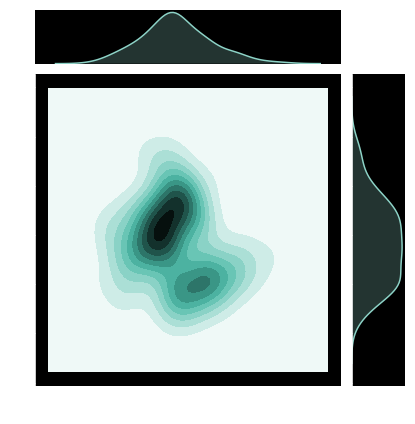

In [11]:
sns.jointplot(x='SepalWidthCm',y='SepalLengthCm',data=iris,kind='kde')


 ## Boxplot for the Species and PetalLengthCm

Text(0.5,1,'Box Plot Of Figure')

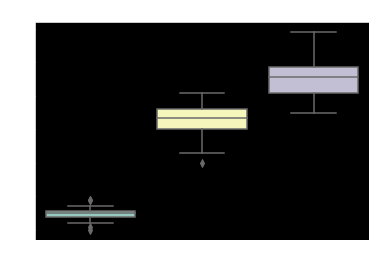

In [12]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.xlabel('Species of the plant')
plt.title('Box Plot Of Figure')

 ## Strip_plot

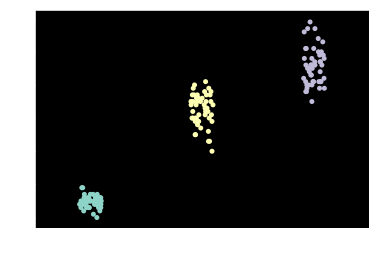

In [13]:
sns.stripplot(x='Species',y='PetalLengthCm',data=iris)


 ## Combining both the boxplot and strip_plot

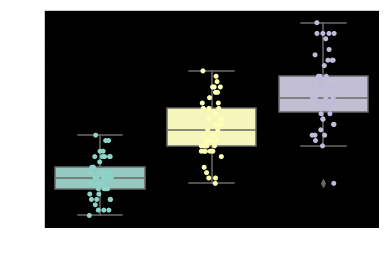

In [14]:
fig=plt.gcf()
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=iris)


 ## Four different kinds of the violin_plots

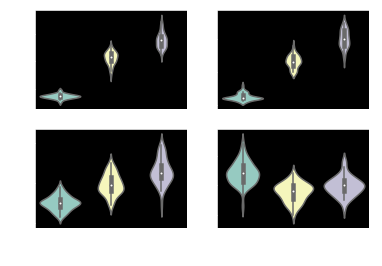

In [15]:
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)


 ## Scattterplot

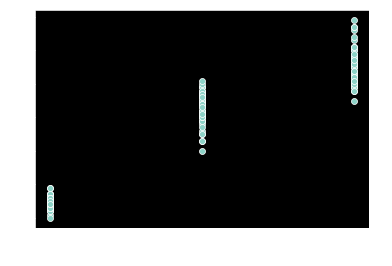

In [16]:
sns.scatterplot(x='Species',y='PetalLengthCm',data=iris)


 ## Pairplot for the iris dataset.

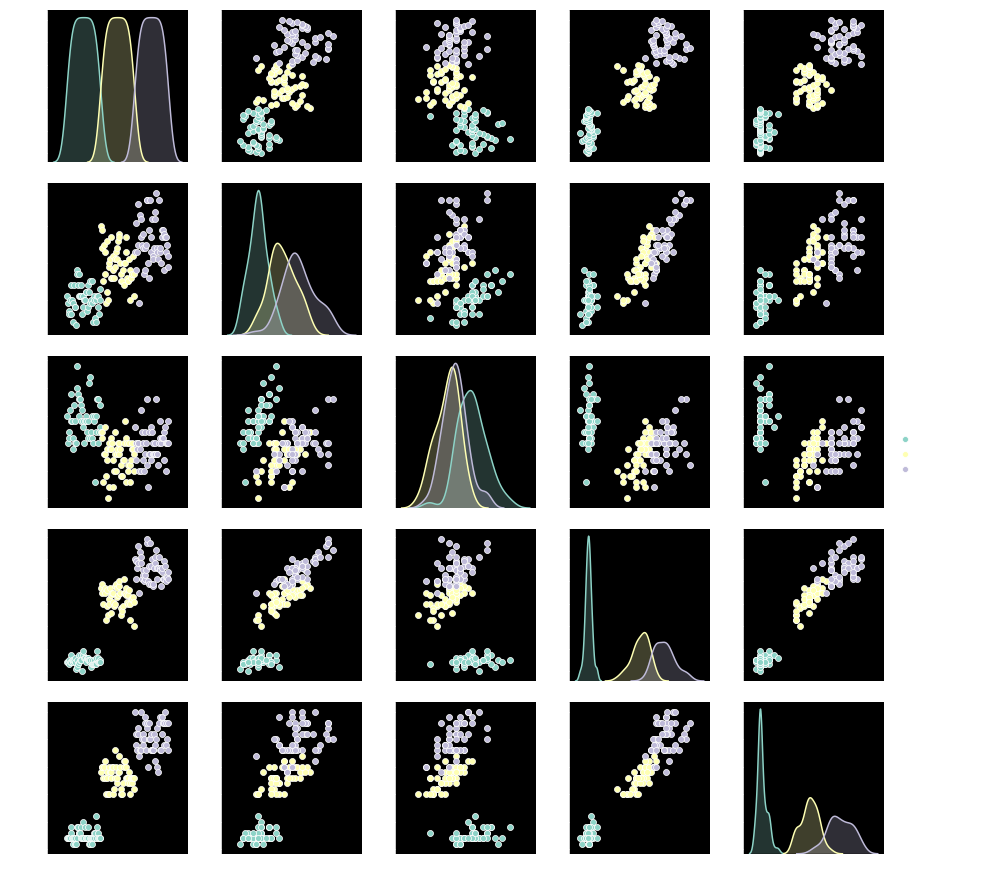

In [17]:
sns.pairplot(data=iris,hue='Species')


 ## Heatmap for the iris dataset.

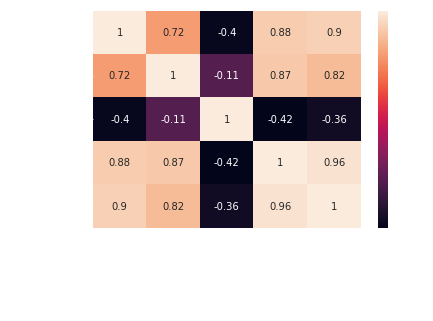

In [18]:
sns.heatmap(data=iris.corr(),annot=True)


 ## Don't know how to plot the distribution plot??

 ## Swarm Plot

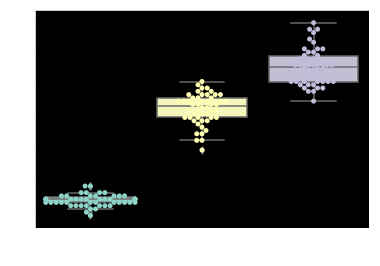

In [19]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
sns.swarmplot(x='Species',y='PetalLengthCm',data=iris)


 ## Lmplot

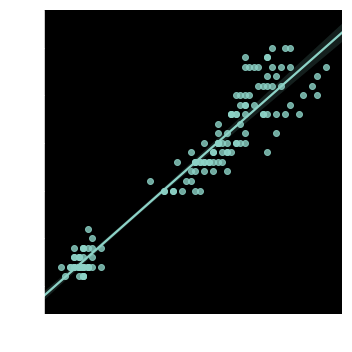

In [20]:
sns.lmplot(x="PetalLengthCm",y='PetalWidthCm',data=iris)


 # FacetGrid is still incomplete?

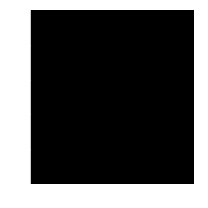

In [21]:
sns.FacetGrid(iris,hue='Species')


/home/rahul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


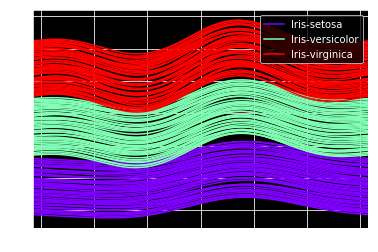

In [22]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris,"Species",colormap='rainbow')
plt.ioff()


 ## Parallel coordinate plot: This type of visualisation is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them. For example, if you had to compare an array of products with the same attributes (comparing computer or cars specs across different models).

/home/rahul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


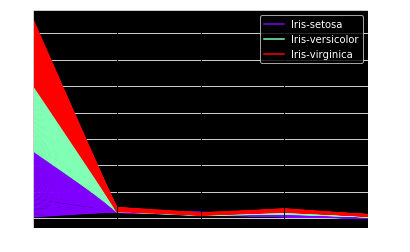

In [23]:
from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(iris,"Species",colormap="rainbow")


 ## Factorplot

/home/rahul/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


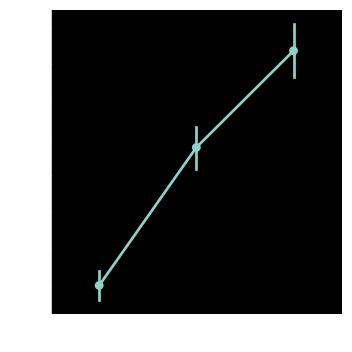

In [24]:
sns.factorplot('Species','SepalLengthCm',data=iris)


 ## Boxenplot

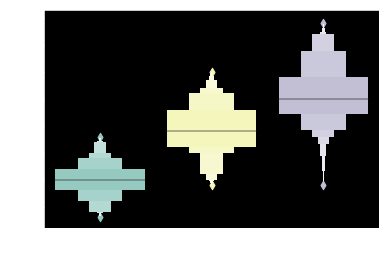

In [25]:
sns.boxenplot('Species','SepalLengthCm',data=iris)


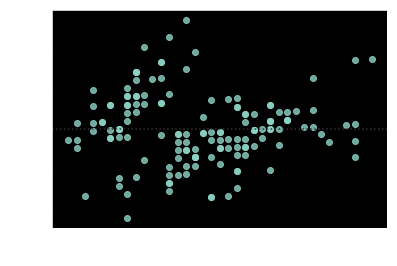

In [26]:
fig=sns.residplot('SepalLengthCm', 'SepalWidthCm',data=iris)

 # How to create the venn diagram pls let me know?

 # Spider Graph is still in prgoress?